In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [2]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])

In [8]:
import warnings
warnings.filterwarnings("ignore")

## Simple exponential Smoothing : alpha - smoothing factor 0 to 1

In [80]:
from sklearn.metrics import r2_score,mean_squared_error
import math
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
def SES_function(data,alpha1,predict_m):
    a  = df.shape[0]
    train_data = data[0:a-predict_m]
    test_data =data[a-predict_m:]
    model1 = SimpleExpSmoothing(train_data)
    model_fit1 = model1.fit(smoothing_level=alpha1,optimized=False)
    # make prediction
    predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
    compare_df = pd.concat(
        [data.tail(predict_m),
        predictions.apply(np.floor)], axis=1).rename(
        columns={'Passengers': 'actual', 0:'predicted'})
    #compare_df.plot()
    r2 = r2_score(data.tail(predict_m), predictions.apply(np.floor))
    rmse1 = np.sqrt(mean_squared_error(data.tail(predict_m), predictions.apply(np.floor)))
    print("RMSE: {} , r2_score:{} ,AIC:{},BIC:{}".format(rmse1, r2 , model_fit1.aic,model_fit1.bic))
    return r2

RMSE: 110.35775157791741 , r2_score:-0.6469443640994241 ,AIC:1075.9487808458348,BIC:1081.8032882161492


-0.6469443640994241

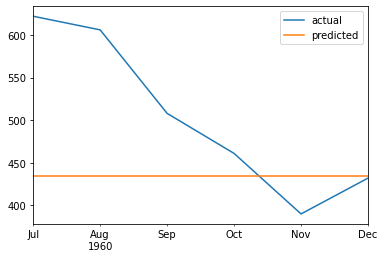

In [32]:
SES_function(df['Passengers'],0.1,6)

RMSE: 98.56385409131146 , r2_score:-0.3137374959149253 ,AIC:1049.0651188145969,BIC:1054.9196261849113


-0.3137374959149253

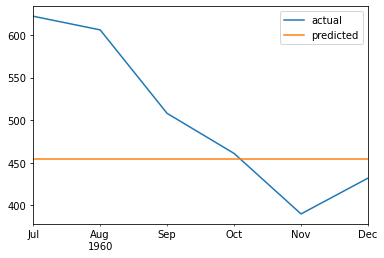

In [33]:
SES_function(df['Passengers'],0.2,6)

In [81]:
alpha1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in alpha1:
    print("alpha: {} ".format(i))
    SES_function(df['Passengers'],i,6)

alpha: 0.1 
RMSE: 110.35775157791741 , r2_score:-0.6469443640994241 ,AIC:1075.9487808458348,BIC:1081.8032882161492
alpha: 0.2 
RMSE: 98.56385409131146 , r2_score:-0.3137374959149253 ,AIC:1049.0651188145969,BIC:1054.9196261849113
alpha: 0.3 
RMSE: 92.53197645498915 , r2_score:-0.1578623132604342 ,AIC:1037.4971630847697,BIC:1043.351670455084
alpha: 0.4 
RMSE: 88.5597726585459 , r2_score:-0.06058682333319565 ,AIC:1025.224825538052,BIC:1031.0793329083665
alpha: 0.5 
RMSE: 86.4802482265941 , r2_score:-0.01136308144230358 ,AIC:1011.8747149048623,BIC:1017.7292222751768
alpha: 0.6 
RMSE: 85.99709297412326 , r2_score:-9.390976398582218e-05 ,AIC:998.4989582444633,BIC:1004.3534656147777
alpha: 0.7 
RMSE: 86.55345169315895 , r2_score:-0.013075995537408014 ,AIC:985.840245592015,BIC:991.6947529623294
alpha: 0.8 
RMSE: 87.82273813388724 , r2_score:-0.043006915515019895 ,AIC:974.281885232192,BIC:980.1363926025065
alpha: 0.9 
RMSE: 89.50698296781096 , r2_score:-0.08339562681011059 ,AIC:964.045329645803

## conclusion: SES is not suitable for this Usecase

### https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html
### https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
### https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.Holt.html
### https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.Holt.fit.html#statsmodels.tsa.holtwinters.Holt.fit

Hyperparameters:

### Alpha: Smoothing factor for the level.

### Beta: Smoothing factor for the trend.

### Trend Type: Additive or multiplicative.

### Dampen Type: Additive or multiplicative.

### Phi: Damping coefficient.
    
As with modeling the trend itself, we can use the same principles in dampening the trend, 
specifically additively or multiplicatively for a linear or exponential dampening effect. 
A damping coefficient Phi (p) is used to control the rate of dampening.

Additive Dampening: Dampen a trend linearly.
Multiplicative Dampening: Dampen the trend exponentially.

In [84]:
from sklearn.metrics import r2_score,mean_squared_error
import math
from statsmodels.tsa.holtwinters import Holt
def DES_function(data,alpha1,beta1,damping_tred1,predict_m):
    a  = df.shape[0]
    train_data = data[0:a-predict_m]
    test_data =data[a-predict_m:]
    model1 = Holt(train_data)
    model_fit1 = model1.fit(smoothing_level = alpha1,damping_trend= dt1,smoothing_slope = beta1,optimized=False)
    # make prediction
    predictions = model_fit1.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)
    compare_df = pd.concat(
        [data.tail(predict_m),
        predictions.apply(np.floor)], axis=1).rename(
        columns={'Passengers': 'actual', 0:'predicted'})
    #compare_df.plot()
    r2 = r2_score(data.tail(predict_m), predictions.apply(np.floor))
    rmse1 = np.sqrt(mean_squared_error(data.tail(predict_m), predictions.apply(np.floor)))
    print("RMSE: {} , r2_score:{} ,AIC:{},BIC:{}".format(rmse1, r2 , model_fit1.aic,model_fit1.bic))
    #return r2

RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891


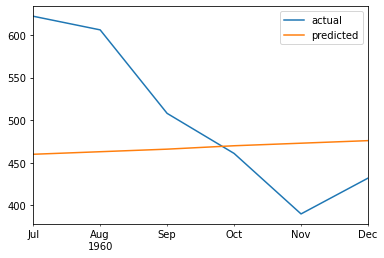

In [83]:
DES_function(df['Passengers'],0.1,0.1,0.2,6)

In [86]:
alpha1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
beta1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
phi1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [87]:
for i in alpha1:
    for j in beta1:
        for k in phi1:
            print("alpha: {} and beta : {} and phi :{}".format(i,j,k))
            DES_function(df['Passengers'],i,j,k,6)
    

alpha: 0.1 and beta : 0.1 and phi :0.1
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta : 0.1 and phi :0.2
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta : 0.1 and phi :0.3
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta : 0.1 and phi :0.4
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta : 0.1 and phi :0.5
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta : 0.1 and phi :0.6
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta : 0.1 and phi :0.7
RMSE: 97.77780934342925 , r2_score:-0.2928669899666807 ,AIC:1056.0625842402621,BIC:1067.771598980891
alpha: 0.1 and beta 

RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :0.4
RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :0.5
RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :0.6
RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :0.7
RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :0.8
RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :0.9
RMSE: 111.49364705369241 , r2_score:-0.6810223392546568 ,AIC:1122.8713082017016,BIC:1134.5803229423304
alpha: 0.1 and beta : 0.8 and phi :1
RMSE: 11

RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :0.4
RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :0.5
RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :0.6
RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :0.7
RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :0.8
RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :0.9
RMSE: 106.7153534720598 , r2_score:-0.5400224632155453 ,AIC:1131.9084362290341,BIC:1143.617450969663
alpha: 0.2 and beta : 0.5 and phi :1
RMSE: 106.715353472059

alpha: 0.3 and beta : 0.3 and phi :0.6
RMSE: 103.0412538743585 , r2_score:-0.43580516353446286 ,AIC:1097.592288932306,BIC:1109.3013036729349
alpha: 0.3 and beta : 0.3 and phi :0.7
RMSE: 103.0412538743585 , r2_score:-0.43580516353446286 ,AIC:1097.592288932306,BIC:1109.3013036729349
alpha: 0.3 and beta : 0.3 and phi :0.8
RMSE: 103.0412538743585 , r2_score:-0.43580516353446286 ,AIC:1097.592288932306,BIC:1109.3013036729349
alpha: 0.3 and beta : 0.3 and phi :0.9
RMSE: 103.0412538743585 , r2_score:-0.43580516353446286 ,AIC:1097.592288932306,BIC:1109.3013036729349
alpha: 0.3 and beta : 0.3 and phi :1
RMSE: 103.0412538743585 , r2_score:-0.43580516353446286 ,AIC:1097.592288932306,BIC:1109.3013036729349
alpha: 0.3 and beta : 0.4 and phi :0.1
RMSE: 113.564225587697 , r2_score:-0.7440395472798096 ,AIC:1118.619041842296,BIC:1130.3280565829248
alpha: 0.3 and beta : 0.4 and phi :0.2
RMSE: 113.564225587697 , r2_score:-0.7440395472798096 ,AIC:1118.619041842296,BIC:1130.3280565829248
alpha: 0.3 and beta

RMSE: 308.9635900878937 , r2_score:-11.908858695856324 ,AIC:1146.6834144779116,BIC:1158.3924292185404
alpha: 0.4 and beta : 0.1 and phi :0.1
RMSE: 96.09890738192604 , r2_score:-0.24884960539117174 ,AIC:1046.0367935352774,BIC:1057.7458082759063
alpha: 0.4 and beta : 0.1 and phi :0.2
RMSE: 96.09890738192604 , r2_score:-0.24884960539117174 ,AIC:1046.0367935352774,BIC:1057.7458082759063
alpha: 0.4 and beta : 0.1 and phi :0.3
RMSE: 96.09890738192604 , r2_score:-0.24884960539117174 ,AIC:1046.0367935352774,BIC:1057.7458082759063
alpha: 0.4 and beta : 0.1 and phi :0.4
RMSE: 96.09890738192604 , r2_score:-0.24884960539117174 ,AIC:1046.0367935352774,BIC:1057.7458082759063
alpha: 0.4 and beta : 0.1 and phi :0.5
RMSE: 96.09890738192604 , r2_score:-0.24884960539117174 ,AIC:1046.0367935352774,BIC:1057.7458082759063
alpha: 0.4 and beta : 0.1 and phi :0.6
RMSE: 96.09890738192604 , r2_score:-0.24884960539117174 ,AIC:1046.0367935352774,BIC:1057.7458082759063
alpha: 0.4 and beta : 0.1 and phi :0.7
RMSE: 9

RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.8 and phi :0.5
RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.8 and phi :0.6
RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.8 and phi :0.7
RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.8 and phi :0.8
RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.8 and phi :0.9
RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.8 and phi :1
RMSE: 255.25281585126538 , r2_score:-7.810779338349366 ,AIC:1097.9432437933337,BIC:1109.6522585339626
alpha: 0.4 and beta : 0.9 and phi :0.1
RMSE: 252.57342

RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :0.4
RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :0.5
RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :0.6
RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :0.7
RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :0.8
RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :0.9
RMSE: 202.228830783348 , r2_score:-4.530436154507856 ,AIC:1071.2932259962806,BIC:1083.0022407369095
alpha: 0.5 and beta : 0.5 and phi :1
RMSE: 202.228830783348 , r2_s

RMSE: 104.92934130483555 , r2_score:-0.4889055004826961 ,AIC:1017.4468399054967,BIC:1029.1558546461256
alpha: 0.6 and beta : 0.1 and phi :0.6
RMSE: 104.92934130483555 , r2_score:-0.4889055004826961 ,AIC:1017.4468399054967,BIC:1029.1558546461256
alpha: 0.6 and beta : 0.1 and phi :0.7
RMSE: 104.92934130483555 , r2_score:-0.4889055004826961 ,AIC:1017.4468399054967,BIC:1029.1558546461256
alpha: 0.6 and beta : 0.1 and phi :0.8
RMSE: 104.92934130483555 , r2_score:-0.4889055004826961 ,AIC:1017.4468399054967,BIC:1029.1558546461256
alpha: 0.6 and beta : 0.1 and phi :0.9
RMSE: 104.92934130483555 , r2_score:-0.4889055004826961 ,AIC:1017.4468399054967,BIC:1029.1558546461256
alpha: 0.6 and beta : 0.1 and phi :1
RMSE: 104.92934130483555 , r2_score:-0.4889055004826961 ,AIC:1017.4468399054967,BIC:1029.1558546461256
alpha: 0.6 and beta : 0.2 and phi :0.1
RMSE: 125.46845553099526 , r2_score:-1.128836683407647 ,AIC:1031.172597665728,BIC:1042.881612406357
alpha: 0.6 and beta : 0.2 and phi :0.2
RMSE: 125.4

RMSE: 226.07815757682857 , r2_score:-5.911788680492688 ,AIC:1044.2009042568798,BIC:1055.9099189975086
alpha: 0.6 and beta : 0.7 and phi :0.6
RMSE: 226.07815757682857 , r2_score:-5.911788680492688 ,AIC:1044.2009042568798,BIC:1055.9099189975086
alpha: 0.6 and beta : 0.7 and phi :0.7
RMSE: 226.07815757682857 , r2_score:-5.911788680492688 ,AIC:1044.2009042568798,BIC:1055.9099189975086
alpha: 0.6 and beta : 0.7 and phi :0.8
RMSE: 226.07815757682857 , r2_score:-5.911788680492688 ,AIC:1044.2009042568798,BIC:1055.9099189975086
alpha: 0.6 and beta : 0.7 and phi :0.9
RMSE: 226.07815757682857 , r2_score:-5.911788680492688 ,AIC:1044.2009042568798,BIC:1055.9099189975086
alpha: 0.6 and beta : 0.7 and phi :1
RMSE: 226.07815757682857 , r2_score:-5.911788680492688 ,AIC:1044.2009042568798,BIC:1055.9099189975086
alpha: 0.6 and beta : 0.8 and phi :0.1
RMSE: 229.77706587037792 , r2_score:-6.139809100231769 ,AIC:1045.2236015124606,BIC:1056.9326162530895
alpha: 0.6 and beta : 0.8 and phi :0.2
RMSE: 229.77706

RMSE: 189.76696235119536 , r2_score:-3.8698373107248702 ,AIC:1023.9978022115839,BIC:1035.7068169522126
alpha: 0.7 and beta : 0.4 and phi :0.9
RMSE: 189.76696235119536 , r2_score:-3.8698373107248702 ,AIC:1023.9978022115839,BIC:1035.7068169522126
alpha: 0.7 and beta : 0.4 and phi :1
RMSE: 189.76696235119536 , r2_score:-3.8698373107248702 ,AIC:1023.9978022115839,BIC:1035.7068169522126
alpha: 0.7 and beta : 0.5 and phi :0.1
RMSE: 209.41147692203182 , r2_score:-4.930266365654569 ,AIC:1024.9682173094052,BIC:1036.677232050034
alpha: 0.7 and beta : 0.5 and phi :0.2
RMSE: 209.41147692203182 , r2_score:-4.930266365654569 ,AIC:1024.9682173094052,BIC:1036.677232050034
alpha: 0.7 and beta : 0.5 and phi :0.3
RMSE: 209.41147692203182 , r2_score:-4.930266365654569 ,AIC:1024.9682173094052,BIC:1036.677232050034
alpha: 0.7 and beta : 0.5 and phi :0.4
RMSE: 209.41147692203182 , r2_score:-4.930266365654569 ,AIC:1024.9682173094052,BIC:1036.677232050034
alpha: 0.7 and beta : 0.5 and phi :0.5
RMSE: 209.411476

RMSE: 256.28499761008254 , r2_score:-7.882180810103188 ,AIC:1028.8931184896476,BIC:1040.6021332302764
alpha: 0.7 and beta : 1 and phi :0.9
RMSE: 256.28499761008254 , r2_score:-7.882180810103188 ,AIC:1028.8931184896476,BIC:1040.6021332302764
alpha: 0.7 and beta : 1 and phi :1
RMSE: 256.28499761008254 , r2_score:-7.882180810103188 ,AIC:1028.8931184896476,BIC:1040.6021332302764
alpha: 0.8 and beta : 0.1 and phi :0.1
RMSE: 115.43901708983262 , r2_score:-0.8020983197665026 ,AIC:990.2424889386209,BIC:1001.9515036792498
alpha: 0.8 and beta : 0.1 and phi :0.2
RMSE: 115.43901708983262 , r2_score:-0.8020983197665026 ,AIC:990.2424889386209,BIC:1001.9515036792498
alpha: 0.8 and beta : 0.1 and phi :0.3
RMSE: 115.43901708983262 , r2_score:-0.8020983197665026 ,AIC:990.2424889386209,BIC:1001.9515036792498
alpha: 0.8 and beta : 0.1 and phi :0.4
RMSE: 115.43901708983262 , r2_score:-0.8020983197665026 ,AIC:990.2424889386209,BIC:1001.9515036792498
alpha: 0.8 and beta : 0.1 and phi :0.5
RMSE: 115.439017089

RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.8 and phi :0.5
RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.8 and phi :0.6
RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.8 and phi :0.7
RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.8 and phi :0.8
RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.8 and phi :0.9
RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.8 and phi :1
RMSE: 249.385244150491 , r2_score:-7.41036313027538 ,AIC:1011.4926020039669,BIC:1023.2016167445958
alpha: 0.8 and beta : 0.9 and phi :0.1
RMSE: 258.3108592374699 , r2_score:-

RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :0.4
RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :0.5
RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :0.6
RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :0.7
RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :0.8
RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :0.9
RMSE: 249.69848484388794 , r2_score:-7.431504096343904 ,AIC:998.7692549661422,BIC:1010.478269706771
alpha: 0.9 and beta : 0.7 and phi :1
RMSE: 249.69848484388794 , r2

RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.3
RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.4
RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.5
RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.6
RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.7
RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.8
RMSE: 210.6711497413287 , r2_score:-5.001825605811887 ,AIC:984.6464999671853,BIC:996.3555147078141
alpha: 1 and beta : 0.4 and phi :0.9
RMSE: 210.6711497413287 , r2_score:-5.0018256058

alpha: 1 and beta : 1 and phi :0.8
RMSE: 316.094395183886 , r2_score:-12.511601612242828 ,AIC:1005.5444542133417,BIC:1017.2534689539706
alpha: 1 and beta : 1 and phi :0.9
RMSE: 316.094395183886 , r2_score:-12.511601612242828 ,AIC:1005.5444542133417,BIC:1017.2534689539706
alpha: 1 and beta : 1 and phi :1
RMSE: 316.094395183886 , r2_score:-12.511601612242828 ,AIC:1005.5444542133417,BIC:1017.2534689539706


## Double Exponential Smoothing method is not suitable for this Usecase

## links:

https://www.youtube.com/watch?v=3mpCzheoXeM

https://machinelearningmastery.com/how-to-grid-search-triple-exponential-smoothing-for-time-series-forecasting-in-python/

https://medium.com/@shrikantpandeymnnit2015/time-series-analysis-and-its-different-approach-in-python-part-1-714dee28041f

https://byjus.com/maths/exponential-smoothing/

https://www.kaggle.com/gauravduttakiit/time-series-forecasting